# Objective

Compare the performance of "expert" annotators: Expert #1 at t0 = 0 and t1 = 6 months, Expert #2 at t1 = 6 months.

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
from skimage.io import imread

In [2]:
image_names = ['ISS_rnd0_ch1_z0', 'ISS_rnd0_ch3_z0', 'ISS_rnd1_ch1_z0']

correctness_threshold = 10



----------------------------------
ISS_rnd0_ch1_z0
----------------------------------


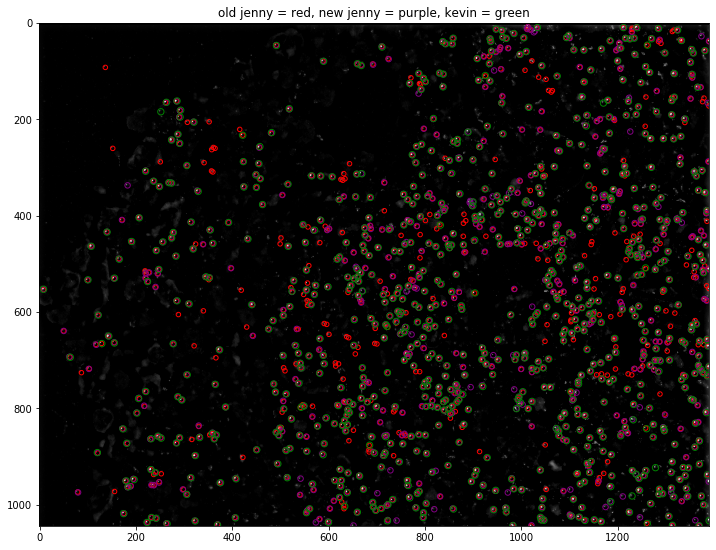

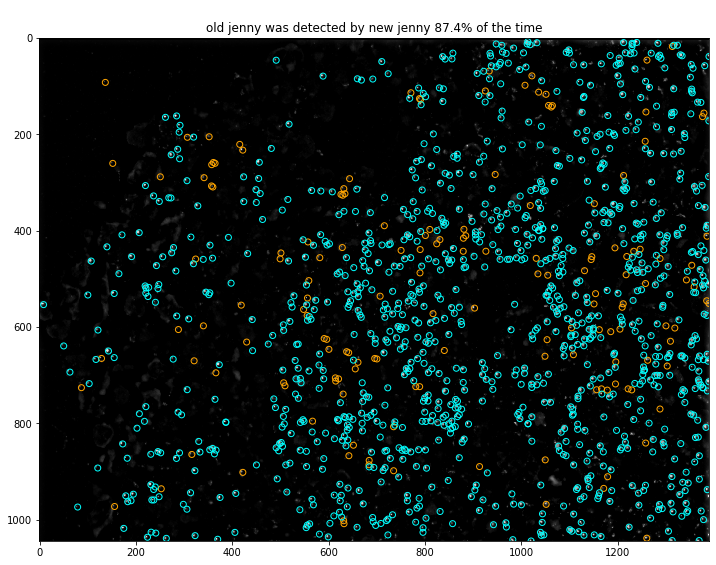

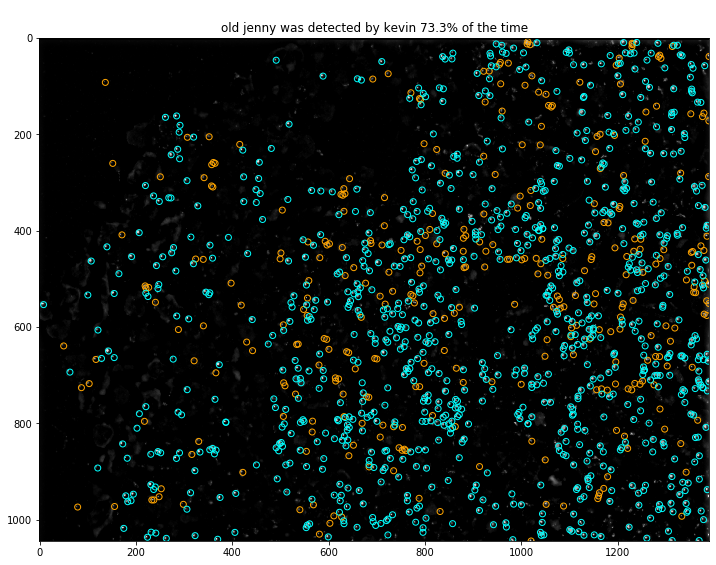

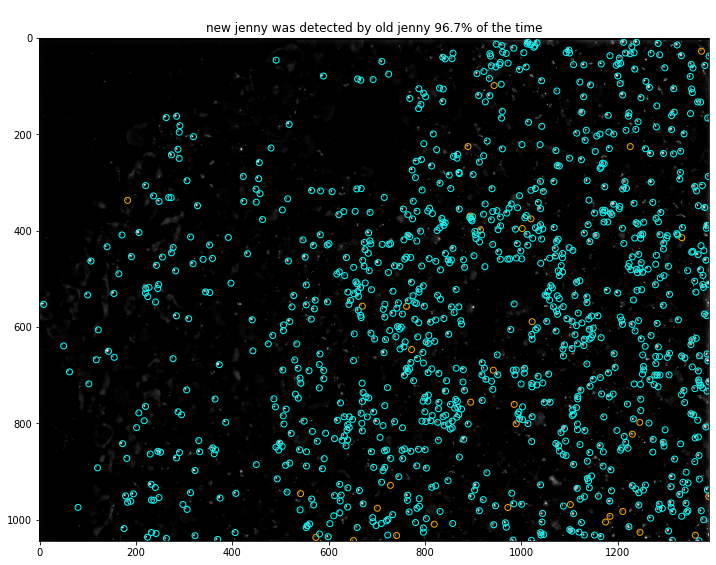

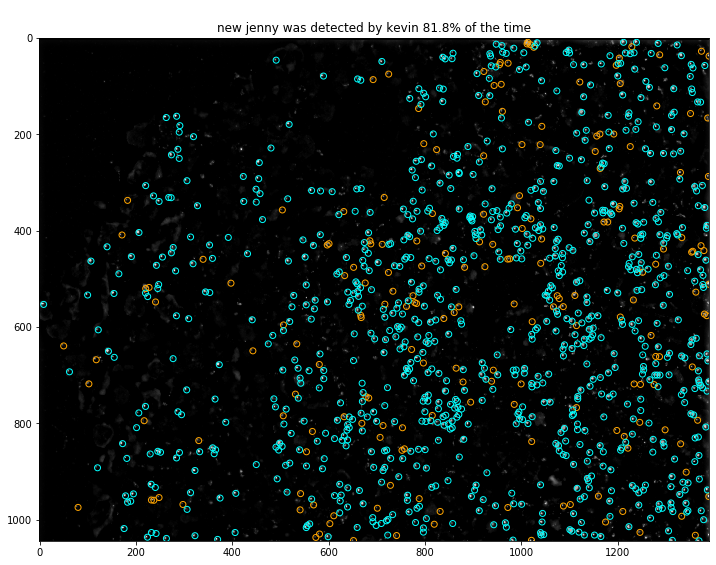

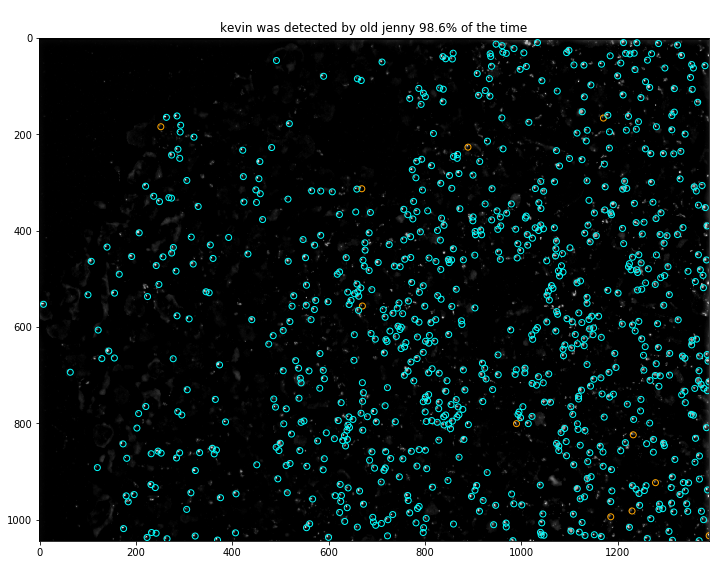

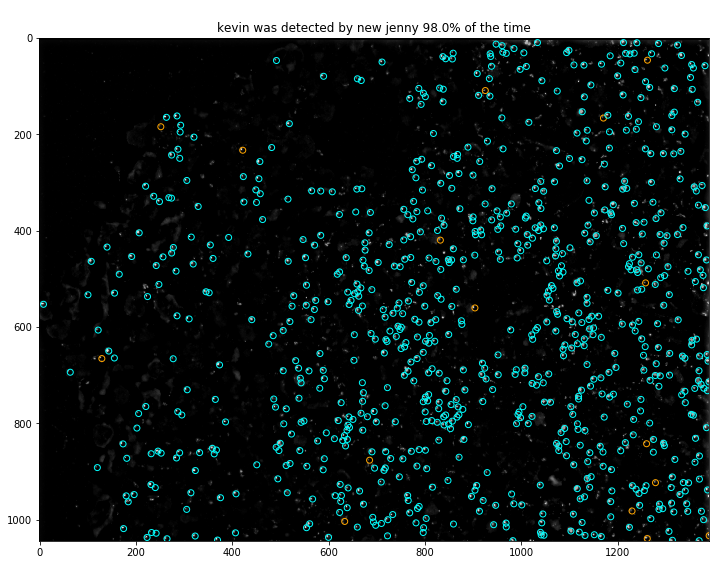


old jenny was detected by new jenny 87.4% of the time

old jenny was detected by kevin 73.3% of the time

new jenny was detected by old jenny 96.7% of the time

new jenny was detected by kevin 81.8% of the time

kevin was detected by old jenny 98.6% of the time

kevin was detected by new jenny 98.0% of the time


----------------------------------
ISS_rnd0_ch3_z0
----------------------------------


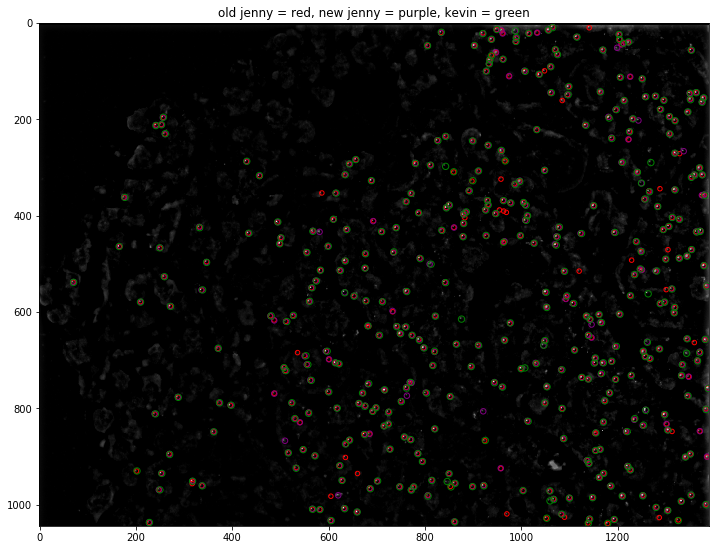

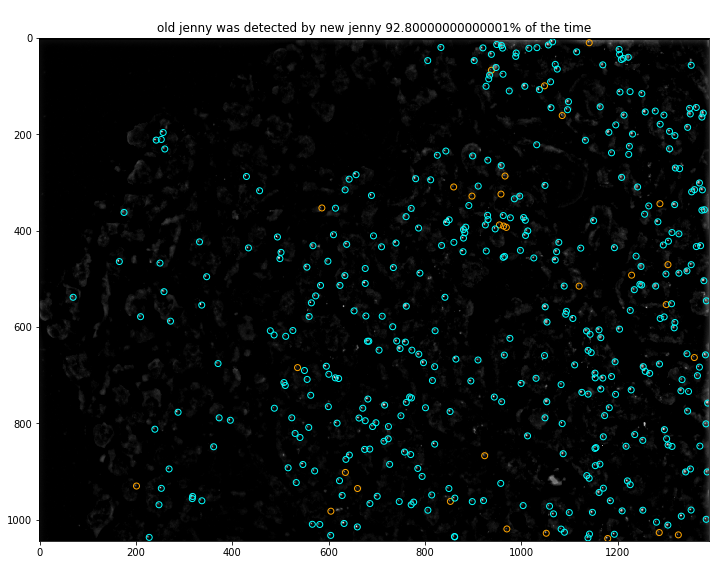

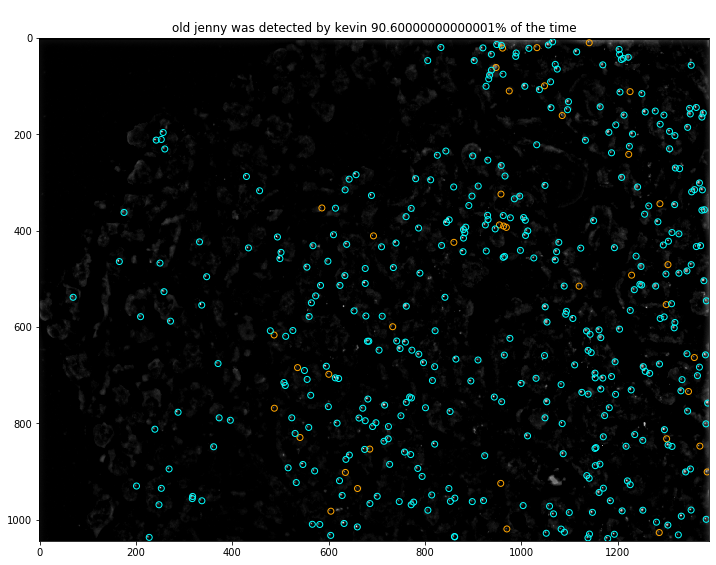

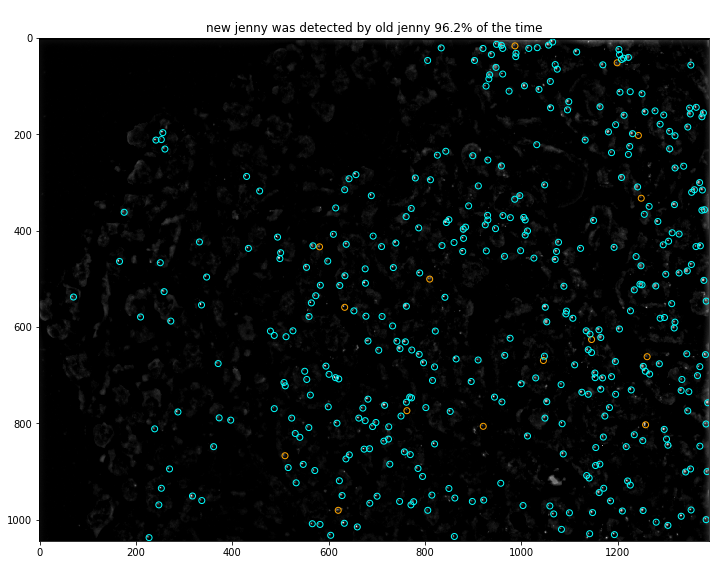

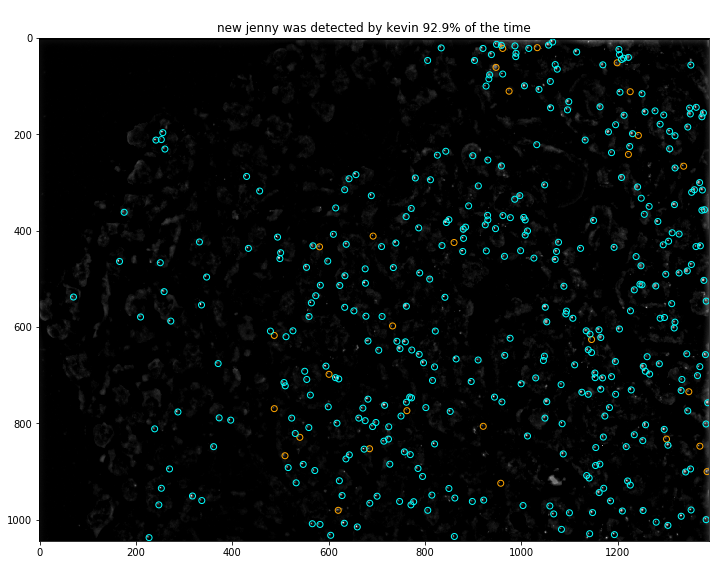

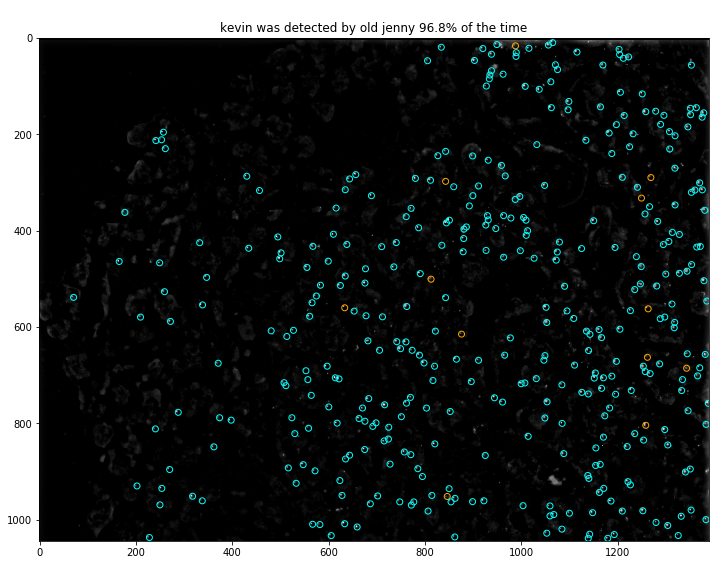

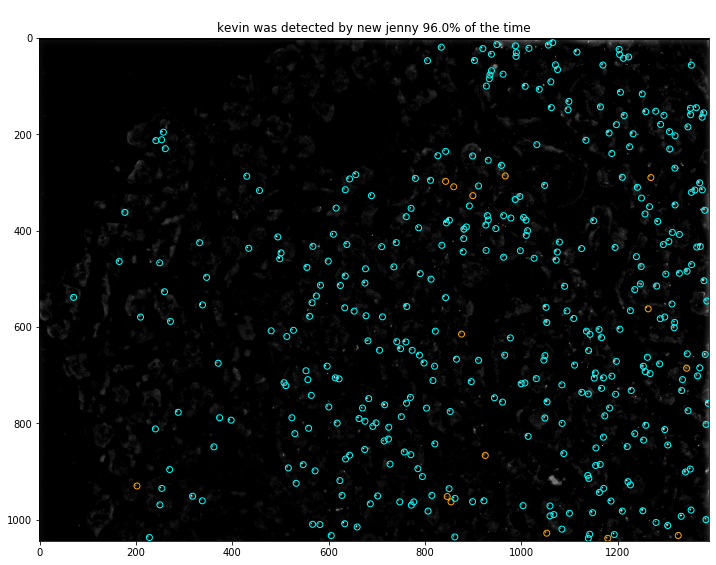


old jenny was detected by new jenny 92.80000000000001% of the time

old jenny was detected by kevin 90.60000000000001% of the time

new jenny was detected by old jenny 96.2% of the time

new jenny was detected by kevin 92.9% of the time

kevin was detected by old jenny 96.8% of the time

kevin was detected by new jenny 96.0% of the time


----------------------------------
ISS_rnd1_ch1_z0
----------------------------------


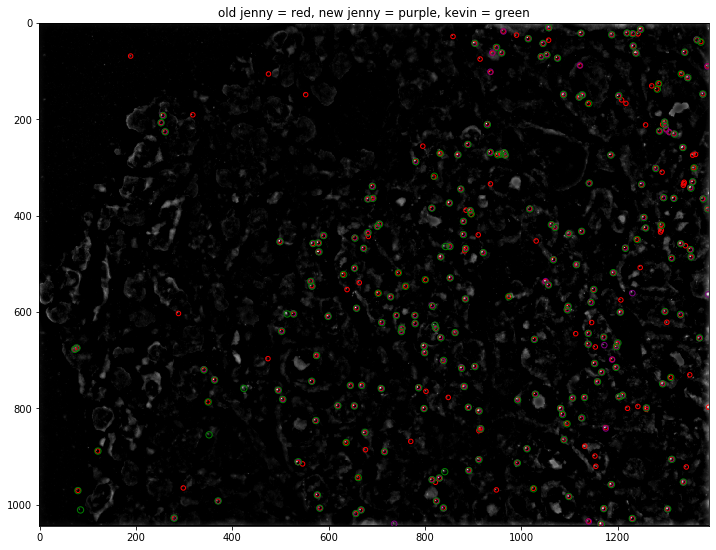

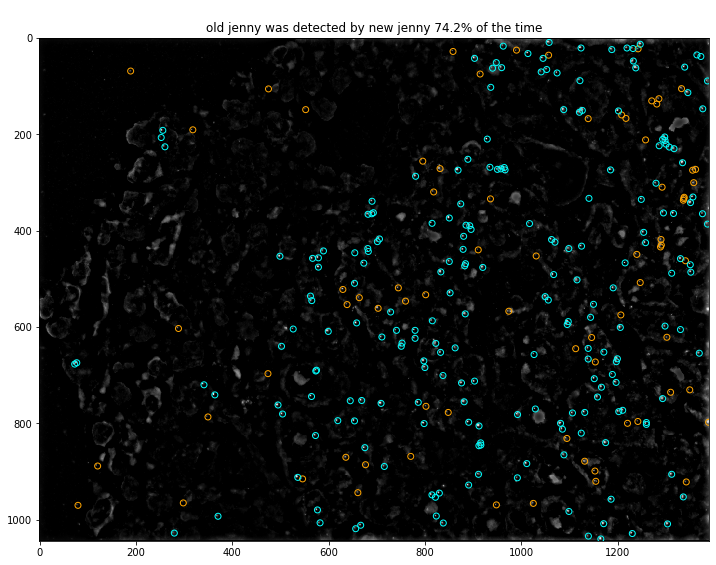

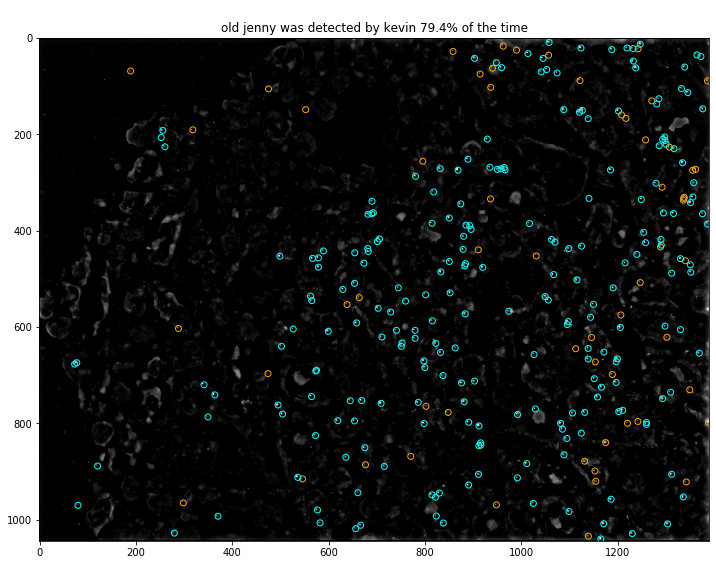

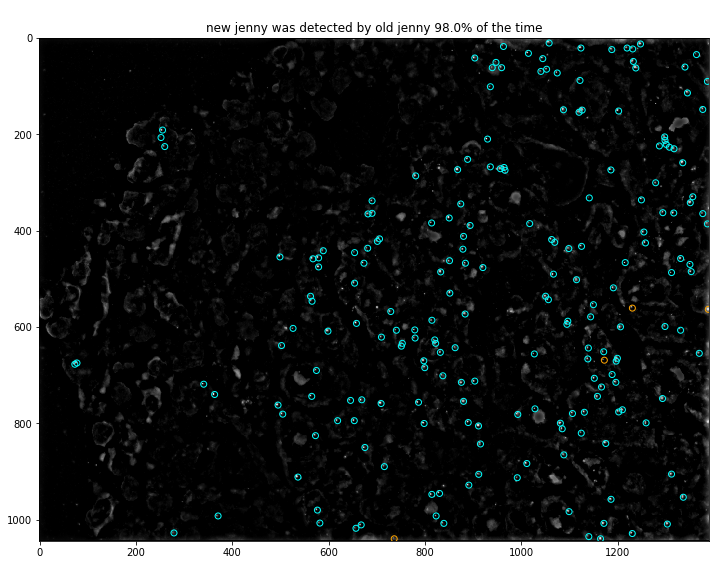

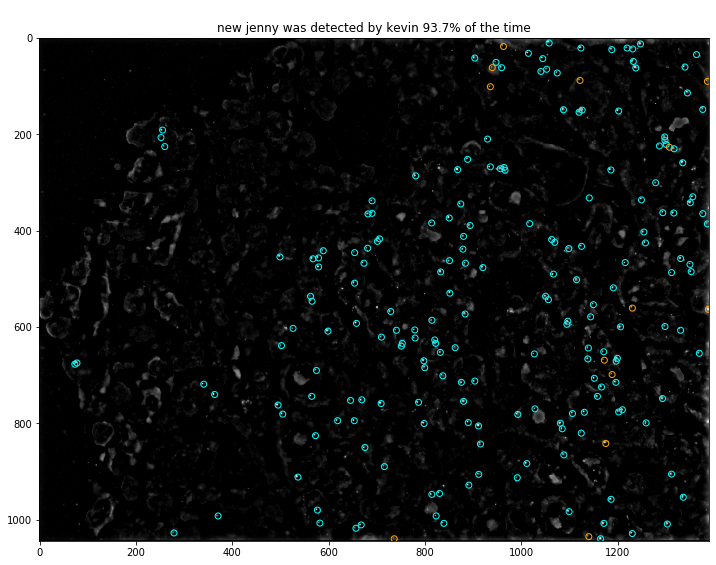

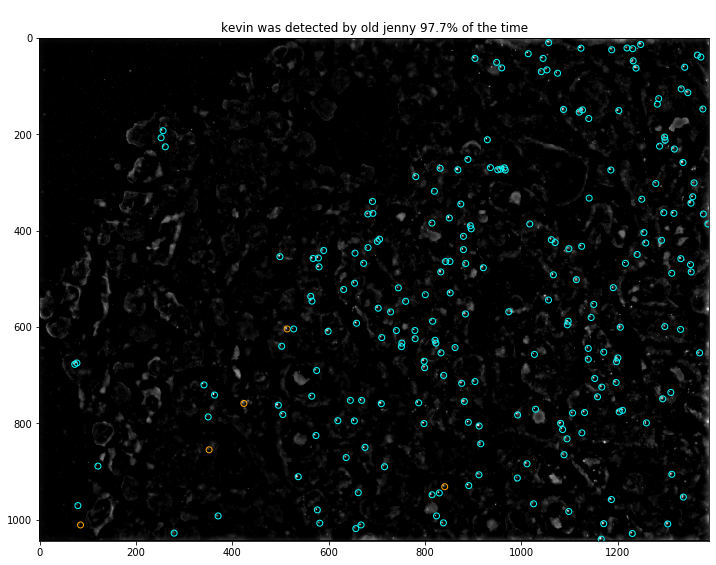

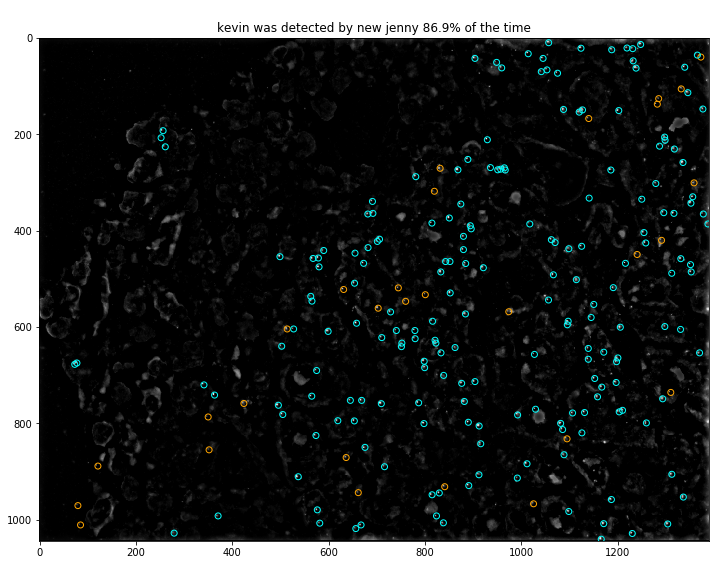


old jenny was detected by new jenny 74.2% of the time

old jenny was detected by kevin 79.4% of the time

new jenny was detected by old jenny 98.0% of the time

new jenny was detected by kevin 93.7% of the time

kevin was detected by old jenny 97.7% of the time

kevin was detected by new jenny 86.9% of the time


In [3]:
for image_name in image_names:
    print('\n\n----------------------------------')
    print(image_name)
    print('----------------------------------')

    img_path = './test_images_filtered/images/%s.png' % image_name
    im = imread(img_path)
    
    coords_path_old_jenny = './test_images_filtered/coords/%s.csv' % image_name
    coords_path_new_jenny = './test_images_filtered/coords_new/%s.csv' % image_name
    coords_path_kevin = './test_images_filtered/coords_kevin/%s.csv' % image_name
    
    coords_old_jenny = np.asarray(pd.read_csv(coords_path_old_jenny))
    coords_new_jenny = np.asarray(pd.read_csv(coords_path_new_jenny))
    coords_kevin = np.asarray(pd.read_csv(coords_path_kevin))
    
    plt.figure(figsize=(12,12))
    for x, y in coords_old_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='red', s=20)
    for x, y in coords_new_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='purple', s=30)        
    for x, y in coords_kevin:
        plt.scatter([x], [y], facecolors='None', edgecolors='green', s=40) 
    plt.title('old jenny = red, new jenny = purple, kevin = green')
    plt.imshow(im, cmap='gray')
    plt.show()
    
    kdt_old_jenny = KDTree(coords_old_jenny, leaf_size=2, metric='euclidean')
    kdt_new_jenny = KDTree(coords_new_jenny, leaf_size=2, metric='euclidean')
    kdt_kevin = KDTree(coords_kevin, leaf_size=2, metric='euclidean')
    
    old_jenny_coord_undetected_by_new_jenny = []
    old_jenny_coord_detected_by_new_jenny = []
    
    old_jenny_coord_undetected_by_kevin = []
    old_jenny_coord_detected_by_kevin = []
    
    new_jenny_coord_undetected_by_old_jenny = []
    new_jenny_coord_detected_by_old_jenny = []
    
    new_jenny_coord_undetected_by_kevin = []
    new_jenny_coord_detected_by_kevin = []
    
    kevin_coord_undetected_by_old_jenny = []
    kevin_coord_detected_by_old_jenny = []
    
    kevin_coord_undetected_by_new_jenny = []
    kevin_coord_detected_by_new_jenny = []
    
    for coord in coords_old_jenny:
        dist, ind = kdt_new_jenny.query([coord], k=1)
        if dist[0][0] < correctness_threshold:
            old_jenny_coord_detected_by_new_jenny.append(coord)
        else:
            old_jenny_coord_undetected_by_new_jenny.append(coord) 
        
        dist, ind = kdt_kevin.query([coord], k=1)
        if dist[0][0] < correctness_threshold:
            old_jenny_coord_detected_by_kevin.append(coord)
        else:
            old_jenny_coord_undetected_by_kevin.append(coord)    
    
    for coord in coords_new_jenny:
        dist, ind = kdt_old_jenny.query([coord], k=1)
        if dist[0][0] < correctness_threshold:
            new_jenny_coord_detected_by_old_jenny.append(coord)
        else:
            new_jenny_coord_undetected_by_old_jenny.append(coord) 
        
        dist, ind = kdt_kevin.query([coord], k=1)
        if dist[0][0] < correctness_threshold:
            new_jenny_coord_detected_by_kevin.append(coord)
        else:
            new_jenny_coord_undetected_by_kevin.append(coord)   
    
    for coord in coords_kevin:
        dist, ind = kdt_old_jenny.query([coord], k=1)
        if dist[0][0] < correctness_threshold:
            kevin_coord_detected_by_old_jenny.append(coord)
        else:
            kevin_coord_undetected_by_old_jenny.append(coord) 
        
        dist, ind = kdt_new_jenny.query([coord], k=1)
        if dist[0][0] < correctness_threshold:
            kevin_coord_detected_by_new_jenny.append(coord)
        else:
            kevin_coord_undetected_by_new_jenny.append(coord) 
    
    reports = []
    
    plt.figure(figsize=(12,12))
    for x, y in old_jenny_coord_undetected_by_new_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='orange')
    for x, y in old_jenny_coord_detected_by_new_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='cyan')
    val = round(len(old_jenny_coord_detected_by_new_jenny)/len(coords_old_jenny), 3)*100
    report = '\nold jenny was detected by new jenny %s%% of the time' % val
    reports.append(report)
    plt.title(report)
    plt.imshow(im, cmap='gray')
    plt.show()
    
    plt.figure(figsize=(12,12))
    for x, y in old_jenny_coord_undetected_by_kevin:
        plt.scatter([x], [y], facecolors='None', edgecolors='orange')
    for x, y in old_jenny_coord_detected_by_kevin:
        plt.scatter([x], [y], facecolors='None', edgecolors='cyan')
    val = round(len(old_jenny_coord_detected_by_kevin)/len(coords_old_jenny), 3)*100
    report = '\nold jenny was detected by kevin %s%% of the time' % val
    reports.append(report)
    plt.title(report)
    plt.imshow(im, cmap='gray')
    plt.show()
    
    plt.figure(figsize=(12,12))
    for x, y in new_jenny_coord_undetected_by_old_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='orange')
    for x, y in new_jenny_coord_detected_by_old_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='cyan')
    val = round(len(new_jenny_coord_detected_by_old_jenny)/len(coords_new_jenny), 3)*100
    report = '\nnew jenny was detected by old jenny %s%% of the time' % val
    reports.append(report)
    plt.title(report)
    plt.imshow(im, cmap='gray')
    plt.show()
        
    plt.figure(figsize=(12,12))
    for x, y in new_jenny_coord_undetected_by_kevin:
        plt.scatter([x], [y], facecolors='None', edgecolors='orange')
    for x, y in new_jenny_coord_detected_by_kevin:
        plt.scatter([x], [y], facecolors='None', edgecolors='cyan')
    val = round(len(new_jenny_coord_detected_by_kevin)/len(coords_new_jenny), 3)*100
    report = '\nnew jenny was detected by kevin %s%% of the time' % val
    reports.append(report)
    plt.title(report)
    plt.imshow(im, cmap='gray')
    plt.show()
    
    plt.figure(figsize=(12,12))
    for x, y in kevin_coord_undetected_by_old_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='orange')
    for x, y in kevin_coord_detected_by_old_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='cyan')
    val = round(len(kevin_coord_detected_by_old_jenny)/len(coords_kevin), 3)*100
    report = '\nkevin was detected by old jenny %s%% of the time' % val
    reports.append(report)
    plt.title(report)
    plt.imshow(im, cmap='gray')
    plt.show()
      
    plt.figure(figsize=(12,12))
    for x, y in kevin_coord_undetected_by_new_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='orange')
    for x, y in kevin_coord_detected_by_new_jenny:
        plt.scatter([x], [y], facecolors='None', edgecolors='cyan')
    val = round(len(kevin_coord_detected_by_new_jenny)/len(coords_kevin), 3)*100
    report = '\nkevin was detected by new jenny %s%% of the time' % val
    reports.append(report)
    plt.title(report)
    plt.imshow(im, cmap='gray')
    plt.show()
    
    for report in reports:
        print(report)
        


# Jaccard Indices

In [4]:
jaccard_indices = []

In [5]:
intersection = max(len(old_jenny_coord_detected_by_new_jenny), len(new_jenny_coord_detected_by_old_jenny))
union = len(old_jenny_coord_undetected_by_new_jenny) + len(new_jenny_coord_undetected_by_old_jenny) + intersection
jaccard_index_old_jenny_new_jenny = intersection/union
intersection, union, jaccard_index_old_jenny_new_jenny
jaccard_indices.append(jaccard_index_old_jenny_new_jenny)

In [6]:
intersection = max(len(old_jenny_coord_detected_by_kevin), len(kevin_coord_detected_by_old_jenny))
union = len(old_jenny_coord_undetected_by_kevin) + len(kevin_coord_undetected_by_old_jenny) + intersection
jaccard_index_old_jenny_kevin = intersection/union
intersection, union, jaccard_index_old_jenny_kevin
jaccard_indices.append(jaccard_index_old_jenny_kevin)

In [7]:
intersection = max(len(new_jenny_coord_detected_by_kevin), len(kevin_coord_detected_by_new_jenny))
union = len(new_jenny_coord_undetected_by_kevin) + len(kevin_coord_undetected_by_new_jenny) + intersection
jaccard_index_new_jenny_kevin = intersection/union
intersection, union, jaccard_index_new_jenny_kevin
jaccard_indices.append(jaccard_index_new_jenny_kevin)

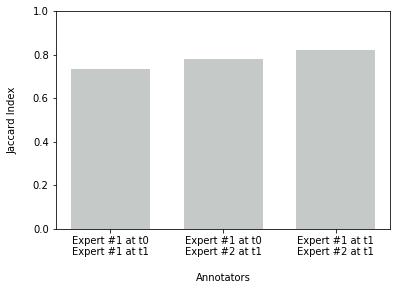

In [9]:
plt.bar(['Expert #1 at t0\nExpert #1 at t1', 'Expert #1 at t0\nExpert #2 at t1', 'Expert #1 at t1\nExpert #2 at t1'], jaccard_indices, width=0.7, align='center', color='xkcd:silver')
plt.xlabel('\nAnnotators')
plt.ylabel('Jaccard Index\n')
plt.yticks(np.arange(0, 1.2, 0.2))
plt.savefig('jaccard_indices_experts.pdf', transparent=True, bbox_inches="tight")
plt.show()

In [10]:
jaccard_indices

[0.7319587628865979, 0.7808219178082192, 0.8212765957446808]